## Ch `07`: Concept 02

## Autoencoder with images

Import the autoencoder class we wrote earlier:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pickle
import numpy as np
from autoencoder_DC import Autoencoder

Define some helper function to load and preprocess the data:

In [2]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

def grayscale(a):
    # reshape to image shape -> take mean on fist (rgb) axis -> flatten again to (index, data)
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

Download the CIFAR-10 dataset in Python from https://www.cs.toronto.edu/~kriz/cifar.html. Then we can load the data using the following code:

In [3]:
names = unpickle('./cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = './cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

data = grayscale(data)
# a matrix is the same as an array but with the restriction that is 2D
# it's slower that an array since it's a subclass
x = np.matrix(data)
y = np.array(labels)

Train the autoencoder on images of horses:

(5000, 1024)
Some examples of horse images we will feed to the autoencoder for training


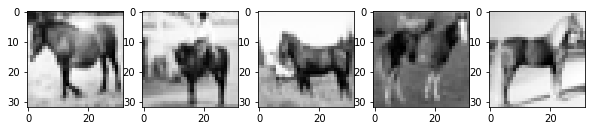

In [4]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)

print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [5]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

epoch 0: loss = 129.77084350585938
epoch 100: loss = 56.2933235168457
epoch 200: loss = 54.168724060058594
epoch 300: loss = 50.35117721557617
epoch 400: loss = 51.81658172607422
epoch 500: loss = 57.036746978759766
epoch 600: loss = 47.42890548706055
epoch 700: loss = 48.96802520751953
epoch 800: loss = 49.31039047241211
epoch 900: loss = 48.2364616394043


Test the autoencoder on other images:

In [6]:
test_data = unpickle('./cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encodings = ae.classify(test_x, test_labels)

INFO:tensorflow:Restoring parameters from ./model.ckpt
data (10000, 1024)
reconstructed (10000, 1024)
loss (10000,)
horse SSD 47.57014168709842
not horse SSD 49.15958528592328


INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt


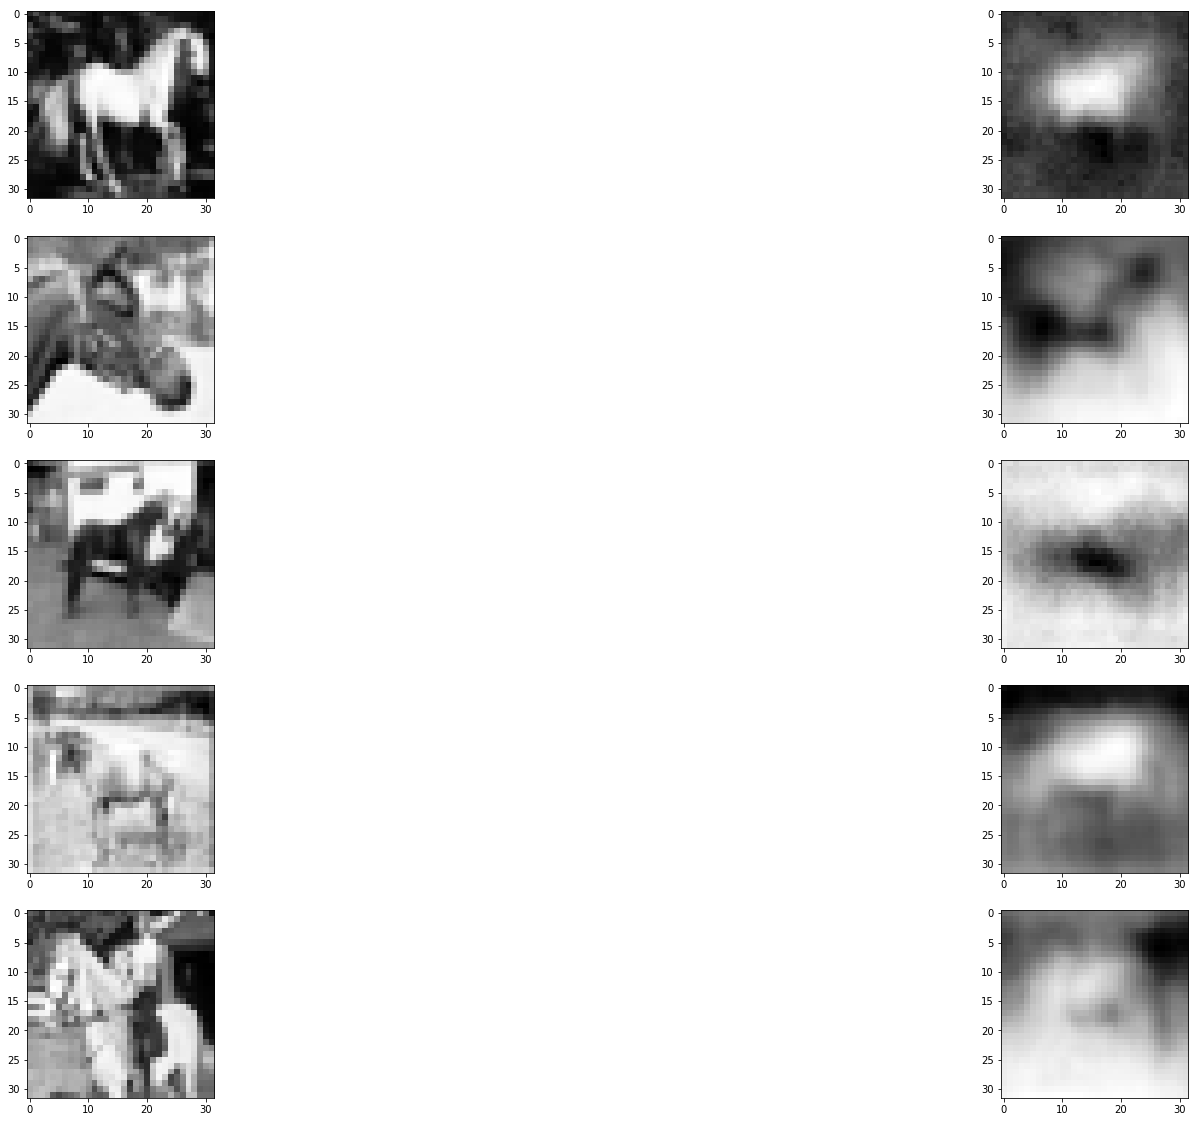

In [9]:
# visualise only images of horses
test_horse_indices = np.where(test_labels == 7)[0]
plt.figure(figsize=(32,20))
for i in range(5):
    plt.subplot(5, 2, i*2 + 1)
    original_img = np.reshape(test_x[test_horse_indices[i], :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(5, 2, i*2 + 2)
    reconstructed_img = ae.decode([encodings[test_horse_indices[i]]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()